In [11]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [0]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt

#For colab cv2 imshow
from google.colab.patches import cv2_imshow

**Pre Processing**

In [15]:
img1=cv2.imread('//content/sample_data/IMG-1627.JPG')
img2=cv2.imread('/content/sample_data/IMG-1627 - Copy.JPG')

print(img1.shape,img2.shape)

(2513, 2119, 3) (1697, 2102, 3)


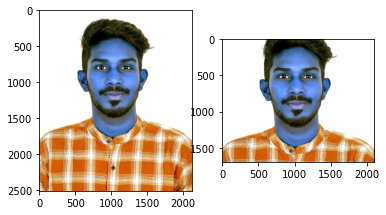

In [18]:
plt.subplot(121)
plt.imshow(img1)

plt.subplot(122)
plt.imshow(img2)

**Brute Force Detection with ORB Descriptors**

In [0]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None) 

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [0]:
# Match descriptors.
matches = bf.match(des1,des2)
print(len(matches))

500


In [0]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
img_matches = cv2.drawMatches(img1,kp1,img2,kp2,matches[:25],None,flags=2)
print(len(img_matches))

4032


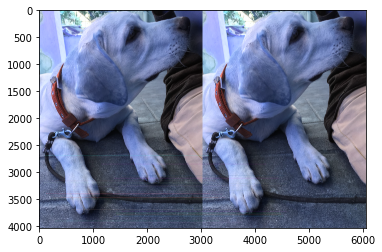

In [0]:
plt.imshow(img_matches)
plt.show()

**Brute-Force Matching with SIFT Descriptors and Ratio Test**

In [0]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

[[<DMatch 0x7f09bacb2610>, <DMatch 0x7f09c36a0370>], [<DMatch 0x7f09b02f7370>, <DMatch 0x7f09b02f7330>], [<DMatch 0x7f09b02f7530>, <DMatch 0x7f09b02f74b0>], [<DMatch 0x7f09b02f7470>, <DMatch 0x7f09b02f73b0>], [<DMatch 0x7f09b02f7290>, <DMatch 0x7f09b02f72f0>], [<DMatch 0x7f09b02f73f0>, <DMatch 0x7f09b02f74f0>], [<DMatch 0x7f09b02f7570>, <DMatch 0x7f09b02f75b0>], [<DMatch 0x7f09b02f75f0>, <DMatch 0x7f09b02f7630>], [<DMatch 0x7f09b02f7670>, <DMatch 0x7f09b02f76b0>], [<DMatch 0x7f09b02f76f0>, <DMatch 0x7f09b02f7730>], [<DMatch 0x7f09b02f7770>, <DMatch 0x7f09b02f77b0>], [<DMatch 0x7f09b02f77f0>, <DMatch 0x7f09b02f7830>], [<DMatch 0x7f09b02f7870>, <DMatch 0x7f09b02f78b0>], [<DMatch 0x7f09b02f78f0>, <DMatch 0x7f09b02f7930>], [<DMatch 0x7f09b02f7970>, <DMatch 0x7f09b02f79b0>], [<DMatch 0x7f09b02f79f0>, <DMatch 0x7f09b02f7a30>], [<DMatch 0x7f09b02f7a70>, <DMatch 0x7f09b02f7ab0>], [<DMatch 0x7f09b02f7af0>, <DMatch 0x7f09b02f7b30>], [<DMatch 0x7f09b02f7b70>, <DMatch 0x7f09b02f7bb0>], [<DMatch 0x

In [0]:
print(matches)

[[<DMatch 0x7f09bacb2610>, <DMatch 0x7f09c36a0370>], [<DMatch 0x7f09b02f7370>, <DMatch 0x7f09b02f7330>], [<DMatch 0x7f09b02f7530>, <DMatch 0x7f09b02f74b0>], [<DMatch 0x7f09b02f7470>, <DMatch 0x7f09b02f73b0>], [<DMatch 0x7f09b02f7290>, <DMatch 0x7f09b02f72f0>], [<DMatch 0x7f09b02f73f0>, <DMatch 0x7f09b02f74f0>], [<DMatch 0x7f09b02f7570>, <DMatch 0x7f09b02f75b0>], [<DMatch 0x7f09b02f75f0>, <DMatch 0x7f09b02f7630>], [<DMatch 0x7f09b02f7670>, <DMatch 0x7f09b02f76b0>], [<DMatch 0x7f09b02f76f0>, <DMatch 0x7f09b02f7730>], [<DMatch 0x7f09b02f7770>, <DMatch 0x7f09b02f77b0>], [<DMatch 0x7f09b02f77f0>, <DMatch 0x7f09b02f7830>], [<DMatch 0x7f09b02f7870>, <DMatch 0x7f09b02f78b0>], [<DMatch 0x7f09b02f78f0>, <DMatch 0x7f09b02f7930>], [<DMatch 0x7f09b02f7970>, <DMatch 0x7f09b02f79b0>], [<DMatch 0x7f09b02f79f0>, <DMatch 0x7f09b02f7a30>], [<DMatch 0x7f09b02f7a70>, <DMatch 0x7f09b02f7ab0>], [<DMatch 0x7f09b02f7af0>, <DMatch 0x7f09b02f7b30>], [<DMatch 0x7f09b02f7b70>, <DMatch 0x7f09b02f7bb0>], [<DMatch 0x

In [0]:
# Apply ratio test
good = []
#Less Distance == Better Match
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [0]:
print(len(matches),len(good))

#Since both are almost similar images, the difference between them both is nearly 50%

3510 182


In [0]:
# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

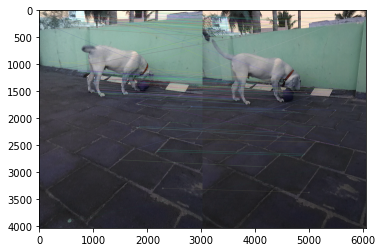

In [0]:
plt.imshow(sift_matches)
plt.show()

**FLANN based Matcher** - Faster than Brute-Force but Accuracy is less than that

In [0]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

#K nearest matches
matches = flann.knnMatch(des1,des2,k=2)

In [0]:
#This block is for making green lines for similar features

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

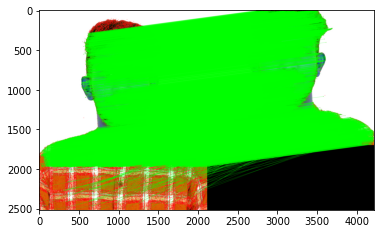

In [21]:
plt.imshow(flann_matches)
plt.show()

In [0]:
#This block is for finding the score

good = []

# ratio test
for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

In [35]:
number_keypoints = 0
if len(kp1) >= len(kp2):
  print('img1')
  number_keypoints = len(kp1)
else:
  number_keypoints = len(kp2)
  print('img2')
print(number_keypoints,len(good))

percentage_similarity = len(good) / number_keypoints * 100
print("Similarity: " + str(int(percentage_similarity)) + "\n")

#Since img1 has more features, we can keep img1 and delete img2

img1
64130 29476
Similarity: 45



In [25]:
print(len(matches),len(good))

#Since both are almost similar images, the difference between them both is nearly 50%

score=(len(good)/len(matches))*100
print(score)

if len(good) < (0.03*len(matches)):
  print("Both images are not same")
else:
  print('Both images are same')

64130 29476
45.96288788398565


**Finding Duplicate images inside a Folder using FLANN Algorithm**

In [0]:
import os
import cv2

folder_path='/content/sample_data/img_folder/'

# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

In [0]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

In [3]:
for i in os.listdir(folder_path):
  i1_name=i
  i=folder_path+i
  img1_temp=cv2.imread(i)
  kp1_temp, des1_temp = sift.detectAndCompute(img1_temp,None)
  for j in os.listdir(folder_path):
    i2_name=j
    j=folder_path+j
    print(i1_name,i2_name)
    if i != j:
      img2_temp=cv2.imread(j)
      kp2_temp, des2_temp = sift.detectAndCompute(img2_temp,None)
      #K nearest matches
      matches_temp = flann.knnMatch(des1_temp,des2_temp,k=2)

      good_temp = []
      # ratio test
      for match1,match2 in matches_temp:
        if match1.distance < 0.7*match2.distance:
          good_temp.append([match1])
      number_keypoints_temp = 0

      if len(kp1_temp) >= len(kp2_temp):
        number_keypoints_temp = len(kp1_temp)
        del_img= i2_name
      else:
        number_keypoints_temp = len(kp2_temp)
        del_img= i1_name
      print(number_keypoints_temp,len(good_temp))

      percentage_similarity = len(good_temp) / number_keypoints_temp * 100
      print("Similarity: " + str(int(percentage_similarity)) )

      if int(percentage_similarity) > 3:
        print('Images ' +i1_name+ ' and ' +i2_name+ ' are duplicates and we can delete '+del_img + "\n" )
      else:
        print('Images ' +i1_name+ ' and ' +i2_name+ ' are not duplicates' + "\n")


IMG-3584.jpg IMG-3584.jpg
IMG-3584.jpg IMG-3255.jpg
91733 22
Similarity: 0
Images IMG-3584.jpg and IMG-3255.jpg are not duplicates

IMG-3584.jpg IMG-3268.jpg
34521 51
Similarity: 0
Images IMG-3584.jpg and IMG-3268.jpg are not duplicates

IMG-3584.jpg IMG-3574.jpg
10517 58
Similarity: 0
Images IMG-3584.jpg and IMG-3574.jpg are not duplicates

IMG-3584.jpg IMG-3583.jpg
6431 784
Similarity: 12
Images IMG-3584.jpg and IMG-3583.jpg are duplicates and we can delete IMG-3584.jpg

IMG-3584.jpg IMG-3575.jpg
7123 41
Similarity: 0
Images IMG-3584.jpg and IMG-3575.jpg are not duplicates

IMG-3584.jpg IMG-3405.jpg
34749 41
Similarity: 0
Images IMG-3584.jpg and IMG-3405.jpg are not duplicates

IMG-3255.jpg IMG-3584.jpg
91733 43
Similarity: 0
Images IMG-3255.jpg and IMG-3584.jpg are not duplicates

IMG-3255.jpg IMG-3255.jpg
IMG-3255.jpg IMG-3268.jpg
91733 15
Similarity: 0
Images IMG-3255.jpg and IMG-3268.jpg are not duplicates

IMG-3255.jpg IMG-3574.jpg
91733 39
Similarity: 0
Images IMG-3255.jpg and 

**Testing**

In [1]:
import os

folder_path='/content/sample_data/img_folder/'

for i in os.listdir(folder_path):
  print(i)

IMG-1627 - Copy (2).JPG
IMG-3584.jpg
IMG-3529.jpg
IMG-3255.jpg
IMG-3551.jpg
IMG-3266.jpg
IMG-3574.jpg
IMG-3412.jpg
IMG-3531.jpg
IMG-3254.jpg
IMG-1627 - Copy.JPG
IMG-3550.jpg
IMG-3583.jpg
IMG-3405.jpg
IMG-1627.JPG
IMG-1627-min1.JPG


In [7]:
file_list=[]

for i in os.listdir(folder_path):
  file_list.append(i)

print(file_list)

['IMG-1627 - Copy (2).JPG', 'IMG-3584.jpg', 'IMG-3529.jpg', 'IMG-3255.jpg', 'IMG-3551.jpg', 'IMG-3266.jpg', 'IMG-3574.jpg', 'IMG-3412.jpg', 'IMG-3531.jpg', 'IMG-3254.jpg', 'IMG-1627 - Copy.JPG', 'IMG-3550.jpg', 'IMG-3583.jpg', 'IMG-3405.jpg', 'IMG-1627.JPG', 'IMG-1627-min1.JPG']


In [24]:
import os
import cv2

folder_path='/content/sample_data/img_folder/'
os.listdir(folder_path)

file_list1=[]
file_list=[]

for i in os.listdir(folder_path):
  file_list.append(i)
  file_list1.append(i)

print(file_list)

for i in file_list:
  for j in file_list1:
    print(i,j)
  
  print('No of files: '+ str(len(file_list)))
  file_list.remove(i)
  file_list1.remove(i)
  
print(file_list)

['.ipynb_checkpoints', 'IMG-3584.jpg', 'IMG-3574.jpg', 'IMG-3583.jpg']
.ipynb_checkpoints .ipynb_checkpoints
.ipynb_checkpoints IMG-3584.jpg
.ipynb_checkpoints IMG-3574.jpg
.ipynb_checkpoints IMG-3583.jpg
No of files: 4
IMG-3574.jpg IMG-3584.jpg
IMG-3574.jpg IMG-3574.jpg
IMG-3574.jpg IMG-3583.jpg
No of files: 3
['IMG-3584.jpg', 'IMG-3583.jpg']
